In [239]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [240]:
#import chardet

#with open("IDCJDW2801.202408.csv","rb") as file:
#    result = chardet.detect(file.read(10000))
#    print(result)

In [241]:
import os 
folder_path = "archivos"
all_files = os.listdir(folder_path)

dfs = []

first_file = True
for file in all_files:
    if file.endswith(".csv"):
        file_path = os.path.join(folder_path,file)
        if first_file:
            df = pd.read_csv(file_path, encoding="ISO-8859-1", skiprows=6)
            df = df.iloc[:, 1:]

            first_file = False
        else: 
            df=pd.read_csv(file_path, encoding="ISO-8859-1", skiprows=6)
            df = df.iloc[:, 1:]
        dfs.append(df)

combined_df = pd.concat(dfs,ignore_index= True)

combined_df.head(40)


,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,2024-09-1,9.5,19.0,0.0,NaN,NaN,NW,67.0,13:22,14.7,...,NaN,NW,26,1013.2,17.9,32.0,NaN,WNW,39.0,1010.6
1,2024-09-2,10.4,14.0,0.0,NaN,NaN,WNW,85.0,10:06,10.8,...,8.0,W,56,1009.8,12.0,34.0,8.0,WNW,43.0,1014.6
2,2024-09-3,-0.1,15.9,0.0,NaN,NaN,NW,30.0,14:59,8.0,...,NaN,NW,11,1029.6,15.0,36.0,NaN,NW,19.0,1028.1
3,2024-09-4,-2.5,20.1,0.0,NaN,NaN,NNW,44.0,15:01,6.4,...,NaN,NNW,7,1028.9,18.3,25.0,4.0,NNW,30.0,1023.8
4,2024-09-5,2.4,22.6,0.0,NaN,NaN,NNW,50.0,12:03,15.1,...,NaN,NNW,28,1024.4,22.0,36.0,3.0,NW,35.0,1021.2
5,2024-09-6,9.0,24.4,0.0,NaN,NaN,NW,63.0,10:28,17.2,...,NaN,NW,35,1023.3,23.6,32.0,NaN,NW,35.0,1018.5
6,2024-09-7,13.2,20.2,0.0,NaN,NaN,NNW,44.0,01:26,13.9,...,7.0,NNW,13,1024.1,19.3,41.0,NaN,N,30.0,1021.6
7,2024-09-8,-0.6,17.6,0.0,NaN,NaN,WNW,50.0,13:48,8.9,...,NaN,ENE,6,1021.8,16.3,36.0,NaN,W,35.0,1017.8
8,2024-09-9,8.6,18.6,0.0,NaN,NaN,NW,54.0,14:50,14.6,...,NaN,NNW,20,1017.6,16.2,44.0,NaN,WNW,31.0,1017.3
9,2024-09-10,-0.8,19.9,0.0,NaN,NaN,NNW,22.0,13:34,9.1,...,NaN,SSE,2,1026.2,19.1,32.0,NaN,NNE,11.0,1023.7


In [242]:
np.shape(combined_df)

(177, 21)

In [243]:
combined_df.isnull().sum()


Date                                   0
Minimum temperature (°C)               0
Maximum temperature (°C)               1
Rainfall (mm)                          0
Evaporation (mm)                     177
Sunshine (hours)                     177
Direction of maximum wind gust         4
Speed of maximum wind gust (km/h)      4
Time of maximum wind gust              4
9am Temperature (°C)                   0
9am relative humidity (%)              0
9am cloud amount (oktas)              75
9am wind direction                     0
9am wind speed (km/h)                  0
9am MSL pressure (hPa)                 0
3pm Temperature (°C)                   1
3pm relative humidity (%)              1
3pm cloud amount (oktas)              77
3pm wind direction                     1
3pm wind speed (km/h)                  1
3pm MSL pressure (hPa)                 1
dtype: int64

In [244]:
columns_drop = ["Evaporation (mm)", "Sunshine (hours)"]


In [245]:
combined_df = combined_df.drop(columns= columns_drop)


In [246]:
combined_df.head()

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,2024-09-1,9.5,19.0,0.0,NW,67.0,13:22,14.7,48,NaN,NW,26,1013.2,17.9,32.0,NaN,WNW,39.0,1010.6
1,2024-09-2,10.4,14.0,0.0,WNW,85.0,10:06,10.8,58,8.0,W,56,1009.8,12.0,34.0,8.0,WNW,43.0,1014.6
2,2024-09-3,-0.1,15.9,0.0,NW,30.0,14:59,8.0,55,NaN,NW,11,1029.6,15.0,36.0,NaN,NW,19.0,1028.1
3,2024-09-4,-2.5,20.1,0.0,NNW,44.0,15:01,6.4,85,NaN,NNW,7,1028.9,18.3,25.0,4.0,NNW,30.0,1023.8
4,2024-09-5,2.4,22.6,0.0,NNW,50.0,12:03,15.1,54,NaN,NNW,28,1024.4,22.0,36.0,3.0,NW,35.0,1021.2


3pm cloud amount (oktas) - Mean: 4.86, Median: 5.0, Std Dev: 2.9164112442271493


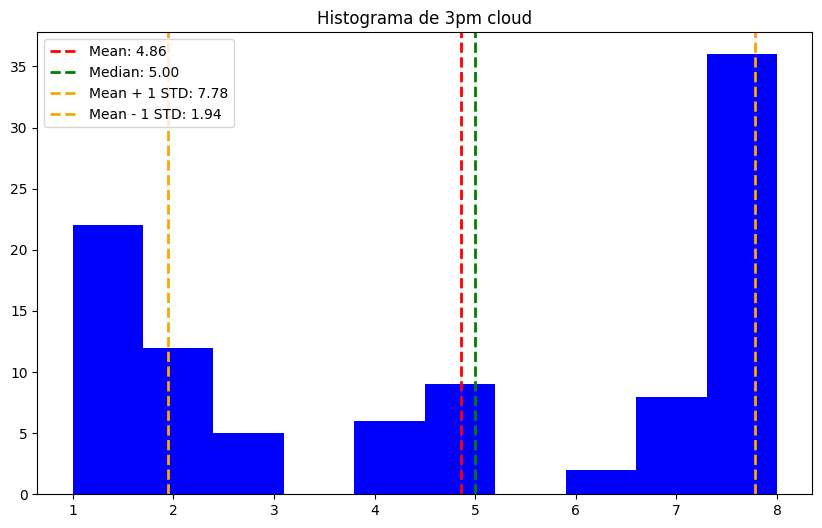

In [247]:
plt.figure(figsize=(10,6))
plt.hist(combined_df["3pm cloud amount (oktas)"], bins=10,color="blue")
plt.title("Histograma de 3pm cloud")

mean_3pm = combined_df["3pm cloud amount (oktas)"].mean()
median_3pm = combined_df["3pm cloud amount (oktas)"].median()
std_3pm = combined_df["3pm cloud amount (oktas)"].std()
print(f"3pm cloud amount (oktas) - Mean: {mean_3pm}, Median: {median_3pm}, Std Dev: {std_3pm}")

plt.axvline(mean_3pm, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_3pm:.2f}')
plt.axvline(median_3pm, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_3pm:.2f}')
plt.axvline(mean_3pm + std_3pm, color='orange', linestyle='dashed', linewidth=2, label=f'Mean + 1 STD: {mean_3pm + std_3pm:.2f}')
plt.axvline(mean_3pm - std_3pm, color='orange', linestyle='dashed', linewidth=2, label=f'Mean - 1 STD: {mean_3pm - std_3pm:.2f}')

plt.legend()

plt.show()


9am cloud amount (oktas) - Mean: 5.715686274509804, Median: 7.0, Std Dev: 2.7118275996649928


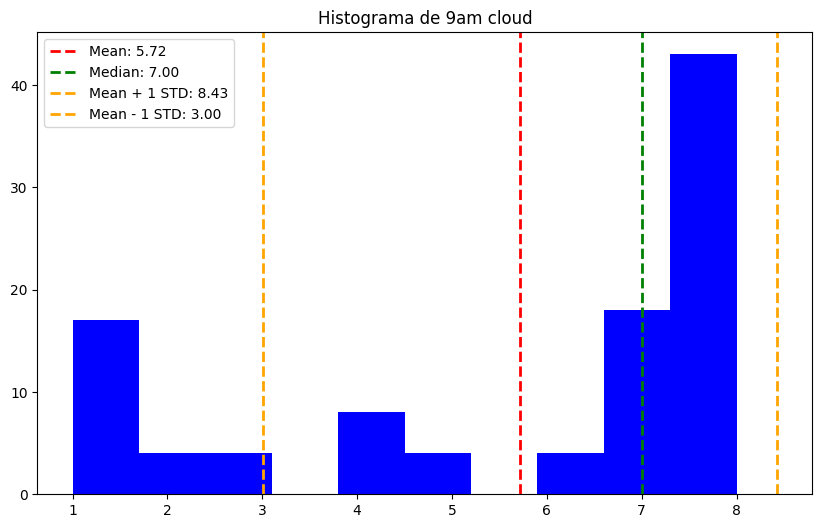

In [248]:
plt.figure(figsize=(10,6))
plt.hist(combined_df["9am cloud amount (oktas)"], bins=10,color="blue")
plt.title("Histograma de 9am cloud")


# Estadísticas para la columna "9am cloud amount (oktas)"
mean_9am = combined_df["9am cloud amount (oktas)"].mean()
median_9am = combined_df["9am cloud amount (oktas)"].median()
std_9am = combined_df["9am cloud amount (oktas)"].std()

# Imprime los resultados
print(f"9am cloud amount (oktas) - Mean: {mean_9am}, Median: {median_9am}, Std Dev: {std_9am}")

plt.axvline(mean_9am, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_9am:.2f}')
plt.axvline(median_9am, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_9am:.2f}')
plt.axvline(mean_9am + std_9am, color='orange', linestyle='dashed', linewidth=2, label=f'Mean + 1 STD: {mean_9am + std_9am:.2f}')
plt.axvline(mean_9am - std_9am, color='orange', linestyle='dashed', linewidth=2, label=f'Mean - 1 STD: {mean_9am - std_9am:.2f}')

plt.legend()

plt.show()

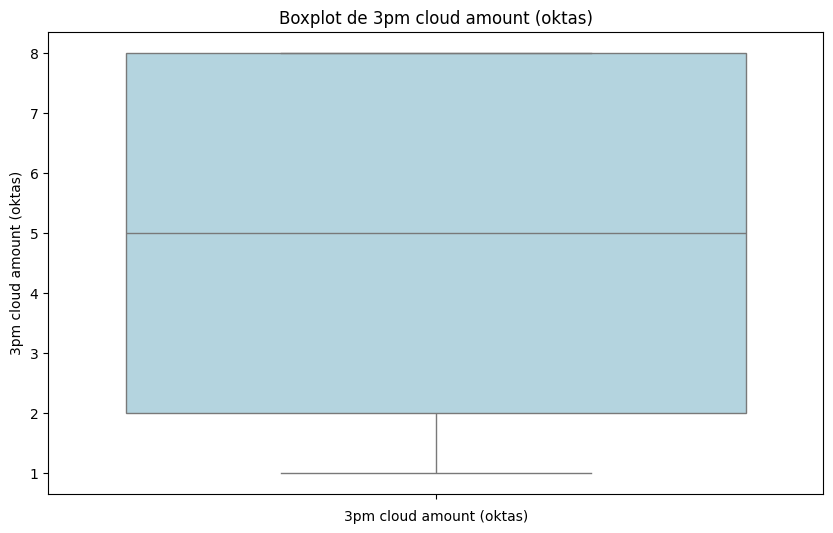

In [249]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(data=combined_df["3pm cloud amount (oktas)"], color='lightblue')

plt.title("Boxplot de 3pm cloud amount (oktas)")
plt.xlabel("3pm cloud amount (oktas)")

plt.show()


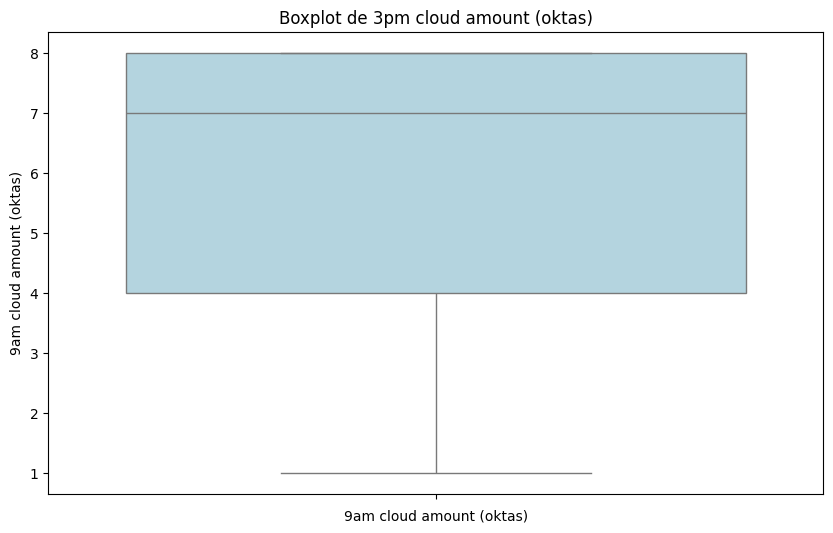

In [250]:
plt.figure(figsize=(10,6))
sns.boxplot(data=combined_df["9am cloud amount (oktas)"], color='lightblue')

plt.title("Boxplot de 3pm cloud amount (oktas)")
plt.xlabel("9am cloud amount (oktas)")

plt.show()


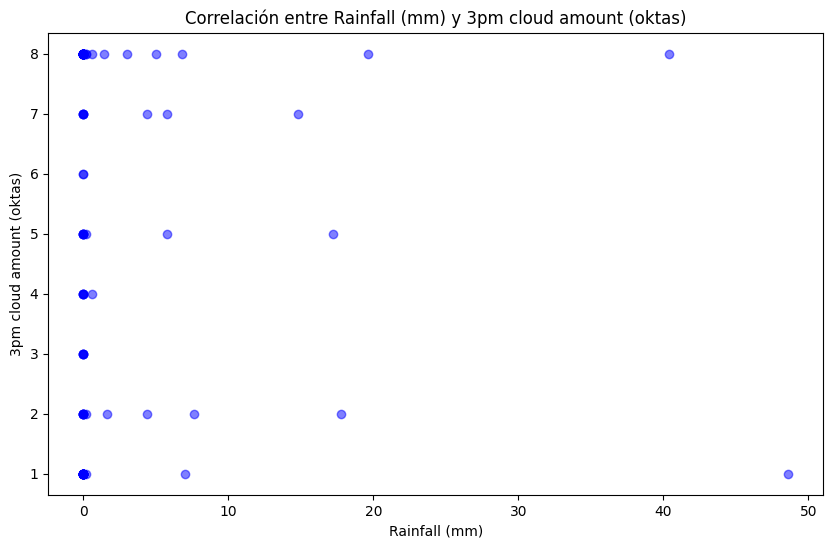

In [251]:
# Crear un gráfico de dispersión entre Rainfall y 3pm cloud amount
plt.figure(figsize=(10, 6))
plt.scatter(combined_df["Rainfall (mm)"], combined_df["3pm cloud amount (oktas)"], alpha=0.5, color="blue")
plt.title("Correlación entre Rainfall (mm) y 3pm cloud amount (oktas)")
plt.xlabel("Rainfall (mm)")
plt.ylabel("3pm cloud amount (oktas)")
plt.show()


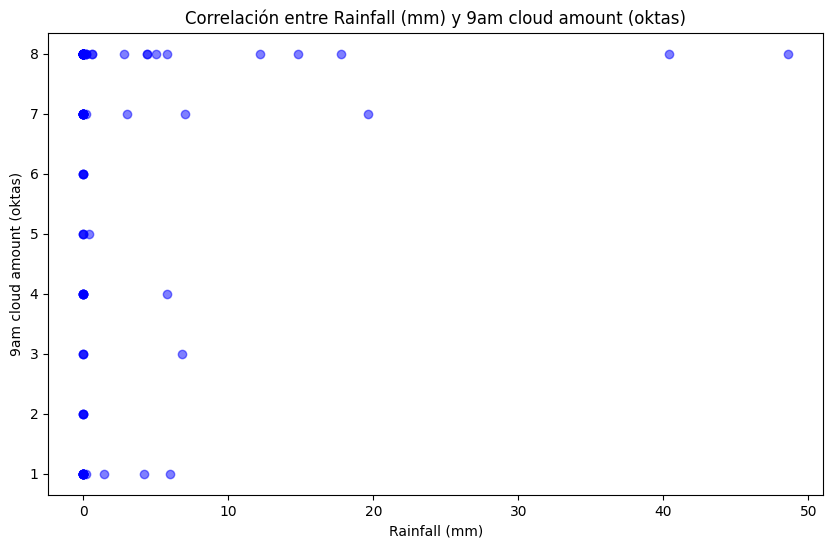

In [252]:
# Crear un gráfico de dispersión entre Rainfall y 3pm cloud amount
plt.figure(figsize=(10, 6))
plt.scatter(combined_df["Rainfall (mm)"], combined_df["9am cloud amount (oktas)"], alpha=0.5, color="blue")
plt.title("Correlación entre Rainfall (mm) y 9am cloud amount (oktas)")
plt.xlabel("Rainfall (mm)")
plt.ylabel("9am cloud amount (oktas)")
plt.show()


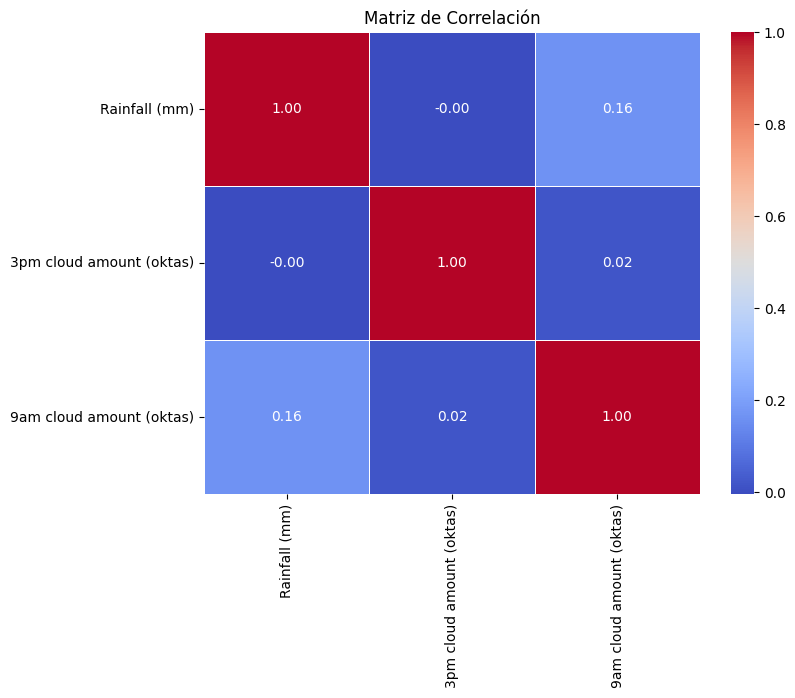

In [253]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula la matriz de correlación para las columnas que te interesan
correlation_matrix = combined_df[["Rainfall (mm)", "3pm cloud amount (oktas)", "9am cloud amount (oktas)"]].corr()

# Crea un heatmap de la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()


In [254]:
combined_df = combined_df.drop(columns=["3pm cloud amount (oktas)","9am cloud amount (oktas)"])

In [255]:
combined_df.head()

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,2024-09-1,9.5,19.0,0.0,NW,67.0,13:22,14.7,48,NW,26,1013.2,17.9,32.0,WNW,39.0,1010.6
1,2024-09-2,10.4,14.0,0.0,WNW,85.0,10:06,10.8,58,W,56,1009.8,12.0,34.0,WNW,43.0,1014.6
2,2024-09-3,-0.1,15.9,0.0,NW,30.0,14:59,8.0,55,NW,11,1029.6,15.0,36.0,NW,19.0,1028.1
3,2024-09-4,-2.5,20.1,0.0,NNW,44.0,15:01,6.4,85,NNW,7,1028.9,18.3,25.0,NNW,30.0,1023.8
4,2024-09-5,2.4,22.6,0.0,NNW,50.0,12:03,15.1,54,NNW,28,1024.4,22.0,36.0,NW,35.0,1021.2


In [256]:
null_values = combined_df.isnull().sum()
data_types = combined_df.dtypes

summary_df = pd.DataFrame({
    'Missing Values': null_values,
    'Data Types': data_types
})

print(summary_df)


                                   Missing Values Data Types
Date                                            0     object
Minimum temperature (°C)                        0    float64
Maximum temperature (°C)                        1    float64
Rainfall (mm)                                   0    float64
Direction of maximum wind gust                  4     object
Speed of maximum wind gust (km/h)               4    float64
Time of maximum wind gust                       4     object
9am Temperature (°C)                            0    float64
9am relative humidity (%)                       0      int64
9am wind direction                              0     object
9am wind speed (km/h)                           0     object
9am MSL pressure (hPa)                          0    float64
3pm Temperature (°C)                            1    float64
3pm relative humidity (%)                       1    float64
3pm wind direction                              1     object
3pm wind speed (km/h)   

In [257]:
combined_df["9am wind speed (km/h)"] = pd.to_numeric(combined_df["9am wind speed (km/h)"], errors="coerce")


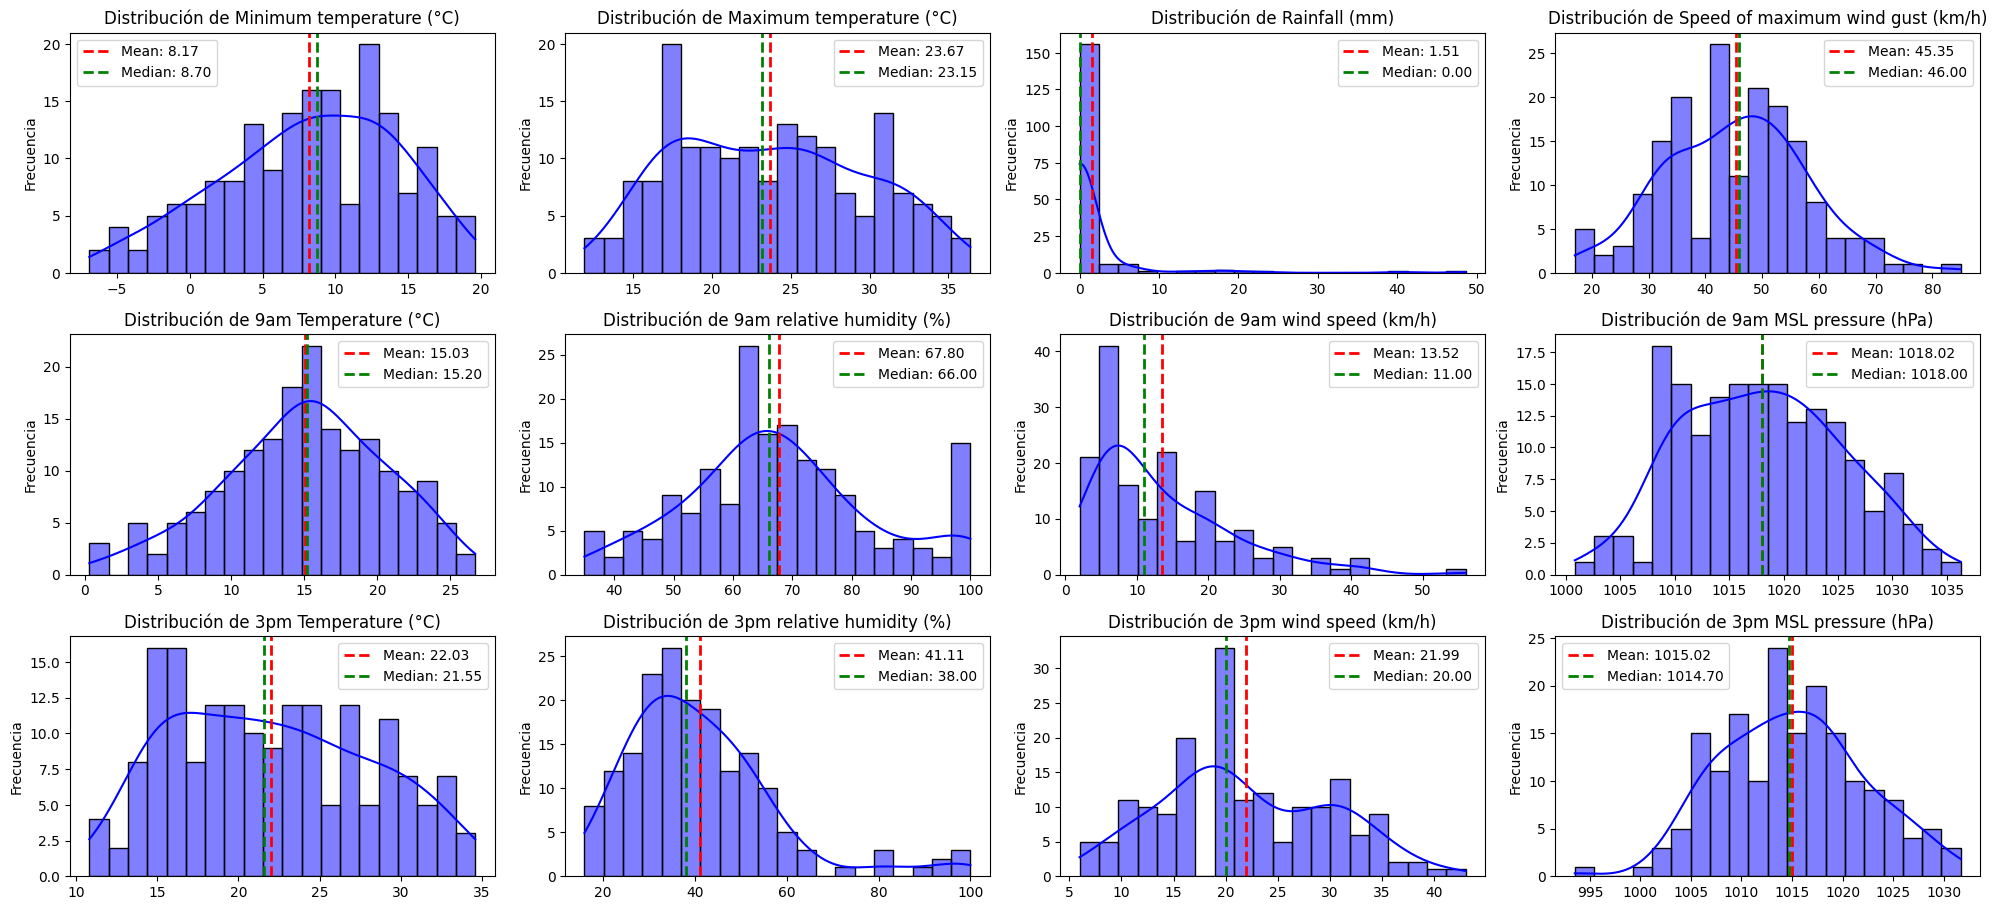

In [258]:
columns_to_plot = combined_df.select_dtypes(include=[np.number]).columns  # Solo numéricas

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    if combined_df[col].isnull().all():
        continue  

    sns.histplot(combined_df[col].dropna(), bins=20, kde=True, ax=axes[i], color="blue")

    mean = combined_df[col].mean()
    median = combined_df[col].median()
    
    axes[i].axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')
    axes[i].axvline(median, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median:.2f}')
    
    axes[i].set_title(f"Distribución de {col}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Frecuencia")
    axes[i].legend()

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


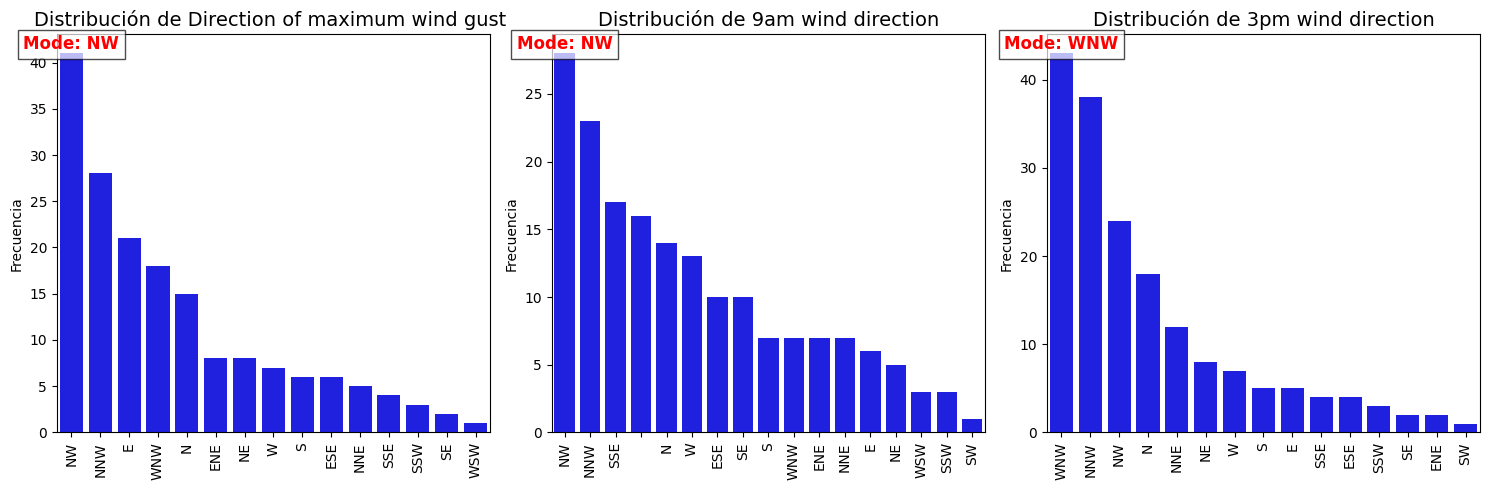

In [259]:
categorical_columns = combined_df.select_dtypes(exclude=[np.number]).columns
categorical_columns = [col for col in categorical_columns if col not in ['Date', 'Time of maximum wind gust']]  

num_categories = len(categorical_columns)
cols = 3  
rows = (num_categories // cols) + (num_categories % cols > 0)  

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(cols * 5, rows * 5))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    if combined_df[col].isnull().all():
        continue  

    value_counts = combined_df[col].value_counts()

    sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[i], color="blue")

    mode_value = combined_df[col].mode()[0]

    axes[i].text(
        x=value_counts.index.get_loc(mode_value), 
        y=value_counts.max(), 
        s=f'Mode: {mode_value}', 
        color='red', fontsize=12, fontweight='bold', 
        ha='center', va='bottom', bbox=dict(facecolor='white', alpha=0.7)
    )

    axes[i].set_title(f"Distribución de {col}", fontsize=14)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Frecuencia")
    
    if len(value_counts) > 5:
        axes[i].tick_params(axis='x', rotation=90)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [260]:
from sklearn.impute import SimpleImputer

numeric_columns = combined_df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = combined_df.select_dtypes(include=['object']).columns

numeric_columns = [col for col in numeric_columns if col != '9am cloud amount (oktas)']
categorical_columns = [col for col in categorical_columns if col != '9am cloud amount (oktas)']

numeric_imputer = SimpleImputer(strategy='median')

categorical_imputer = SimpleImputer(strategy='most_frequent')

combined_df[numeric_columns] = numeric_imputer.fit_transform(combined_df[numeric_columns])

combined_df[categorical_columns] = categorical_imputer.fit_transform(combined_df[categorical_columns])

combined_df.isnull().sum()

Date                                 0
Minimum temperature (°C)             0
Maximum temperature (°C)             0
Rainfall (mm)                        0
Direction of maximum wind gust       0
Speed of maximum wind gust (km/h)    0
Time of maximum wind gust            0
9am Temperature (°C)                 0
9am relative humidity (%)            0
9am wind direction                   0
9am wind speed (km/h)                0
9am MSL pressure (hPa)               0
3pm Temperature (°C)                 0
3pm relative humidity (%)            0
3pm wind direction                   0
3pm wind speed (km/h)                0
3pm MSL pressure (hPa)               0
dtype: int64

In [261]:
df.isnull().sum()

Date                                  0
Minimum temperature (°C)              0
Maximum temperature (°C)              0
Rainfall (mm)                         0
Evaporation (mm)                     31
Sunshine (hours)                     31
Direction of maximum wind gust        1
Speed of maximum wind gust (km/h)     1
Time of maximum wind gust             1
9am Temperature (°C)                  0
9am relative humidity (%)             0
9am cloud amount (oktas)             12
9am wind direction                    0
9am wind speed (km/h)                 0
9am MSL pressure (hPa)                0
3pm Temperature (°C)                  1
3pm relative humidity (%)             1
3pm cloud amount (oktas)             16
3pm wind direction                    1
3pm wind speed (km/h)                 1
3pm MSL pressure (hPa)                1
dtype: int64

In [262]:
null_values = combined_df.isnull().sum()
data_types = combined_df.dtypes

summary_df = pd.DataFrame({
    'Missing Values': null_values,
    'Data Types': data_types
})

print(summary_df)

                                   Missing Values Data Types
Date                                            0     object
Minimum temperature (°C)                        0    float64
Maximum temperature (°C)                        0    float64
Rainfall (mm)                                   0    float64
Direction of maximum wind gust                  0     object
Speed of maximum wind gust (km/h)               0    float64
Time of maximum wind gust                       0     object
9am Temperature (°C)                            0    float64
9am relative humidity (%)                       0    float64
9am wind direction                              0     object
9am wind speed (km/h)                           0    float64
9am MSL pressure (hPa)                          0    float64
3pm Temperature (°C)                            0    float64
3pm relative humidity (%)                       0    float64
3pm wind direction                              0     object
3pm wind speed (km/h)   

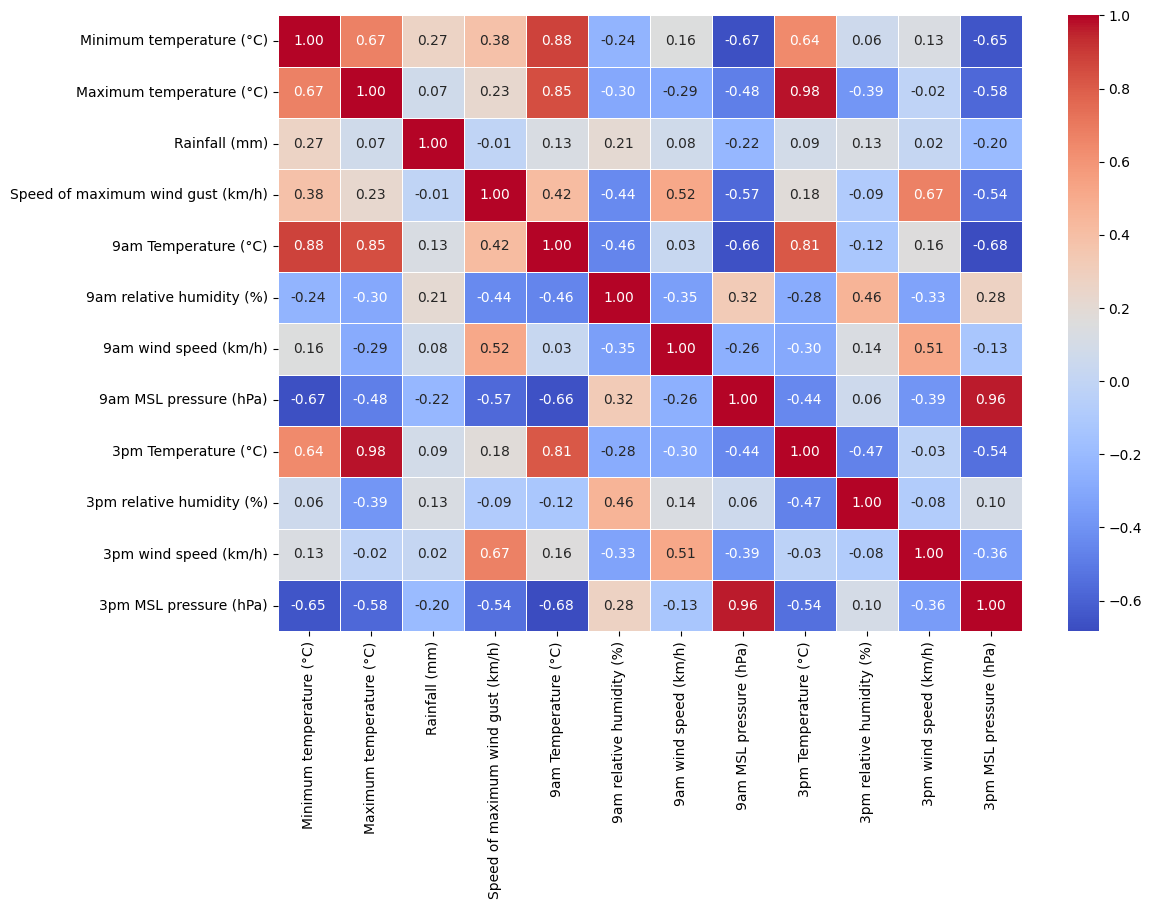

In [263]:
# Seleccionar solo columnas numéricas (ignorando las categóricas)
numeric_df = combined_df.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación solo con las columnas numéricas
correlation_matrix = numeric_df.corr()

# Visualizar la matriz de correlación
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()


In [264]:
combined_df.describe()

,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%),9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm wind speed (km/h),3pm MSL pressure (hPa)
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.00000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,8.174011,23.669774,1.512994,45.361582,15.025424,67.79661,13.288136,1018.015819,22.031356,41.090395,21.983051,1015.016949
std,6.053493,6.018362,5.761224,12.314731,5.516605,15.54076,9.266970,7.343827,6.004235,16.184405,8.133457,6.994157
min,-6.900000,11.900000,0.000000,17.000000,0.300000,35.00000,2.000000,1000.800000,10.800000,16.000000,6.000000,993.500000
25%,4.100000,18.500000,0.000000,37.000000,11.400000,58.00000,7.000000,1012.300000,16.700000,30.000000,17.000000,1009.900000
50%,8.700000,23.150000,0.000000,46.000000,15.200000,66.00000,11.000000,1018.000000,21.550000,38.000000,20.000000,1014.700000
75%,12.800000,28.100000,0.000000,52.000000,19.000000,76.00000,19.000000,1023.400000,26.700000,49.000000,30.000000,1019.500000
max,19.600000,36.400000,48.600000,85.000000,26.700000,100.00000,56.000000,1036.300000,34.600000,100.000000,43.000000,1031.700000


# Simple Linear Regression

I choose this features cause i've seen a big relation in the corr matrix

     9am MSL pressure (hPa)
0                    1013.2
1                    1009.8
2                    1029.6
3                    1028.9
4                    1024.4
..                      ...
172                  1019.8
173                  1018.5
174                  1023.4
175                  1018.2
176                  1011.5

[177 rows x 1 columns]
0      1010.6
1      1014.6
2      1028.1
3      1023.8
4      1021.2
        ...  
172    1016.3
173    1015.4
174    1019.3
175    1012.6
176    1008.6
Name: 3pm MSL pressure (hPa), Length: 177, dtype: float64
coeficient [0.88684578] intercept 112.2833643189964


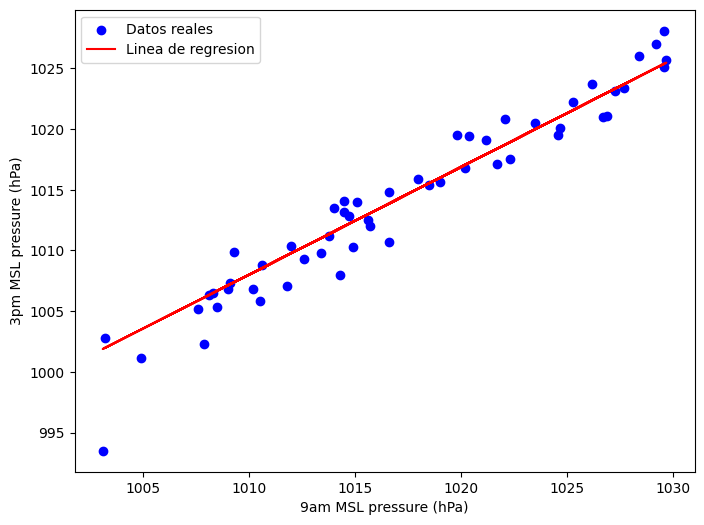

In [289]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split


X = combined_df[['9am MSL pressure (hPa)']]
y = combined_df['3pm MSL pressure (hPa)']

print(X)
print(y)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state= 42)

model = LinearRegression()

model.fit(X_train,y_train)

print("coeficient", model.coef_, "intercept", model.intercept_)

y_pred = model.predict(X_test)

plt.figure(figsize=(8,6))

plt.scatter(X_test,y_test,color='blue', label ='Datos reales')
plt.plot(X_test,y_pred, color = 'red', label = 'Linea de regresion')
plt.xlabel('9am MSL pressure (hPa)')
plt.ylabel('3pm MSL pressure (hPa)')
plt.legend()
plt.show()


In [290]:
mse_LR = mean_squared_error(y_test, y_pred)
mae_LR = mean_absolute_error(y_test, y_pred)
r2_LR = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse_LR:.2f}")
print(f"Mean Absolute Error (MAE): {mae_LR:.2f}")
print(f"R² Score: {r2_LR:.2f}")


Mean Squared Error (MSE): 3.90
Mean Absolute Error (MAE): 1.44
R² Score: 0.93


In [291]:
rain=combined_df[['Rainfall (mm)']]
rain.head(50)

,Rainfall (mm)
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0


# Multiple Linear regression        

In [302]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


X = combined_df[['9am MSL pressure (hPa)','3pm MSL pressure (hPa)','9am relative humidity (%)', '3pm relative humidity (%)', 'Minimum temperature (°C)']]
y = combined_df['Rainfall (mm)']

print(X)
print(y)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state= 42)

scaler = MinMaxScaler()

x_train_escaled = scaler.fit_transform(X_train)
X_test_escaled =scaler.transform(X_test)


model = LinearRegression()

model.fit(x_train_escaled,y_train)

print("coeficient", model.coef_, "intercept", model.intercept_)

y_pred = model.predict(X_test_escaled)



     9am MSL pressure (hPa)  3pm MSL pressure (hPa)  \
0                    1013.2                  1010.6   
1                    1009.8                  1014.6   
2                    1029.6                  1028.1   
3                    1028.9                  1023.8   
4                    1024.4                  1021.2   
..                      ...                     ...   
172                  1019.8                  1016.3   
173                  1018.5                  1015.4   
174                  1023.4                  1019.3   
175                  1018.2                  1012.6   
176                  1011.5                  1008.6   

     9am relative humidity (%)  3pm relative humidity (%)  \
0                         48.0                       32.0   
1                         58.0                       34.0   
2                         55.0                       36.0   
3                         85.0                       25.0   
4                         54.0    

In [303]:
mse_MR = mean_squared_error(y_test, y_pred)
mae_MR = mean_absolute_error(y_test, y_pred)
r2_MR = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse_MR:.2f}")
print(f"Mean Absolute Error (MAE): {mae_MR:.2f}")
print(f"R² Score: {r2_MR:.2f}")

Mean Squared Error (MSE): 35.88
Mean Absolute Error (MAE): 3.17
R² Score: 0.07
